<a href="https://colab.research.google.com/github/analuizasb2/fetal-health-prediction/blob/main/FetalHealthClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo para Classificação de Saúde fetal baseado em dados de Cardiotocografia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Leitura do dataset

O conjunto de dados contém dados de 2126 fetos, coletados através do exame de cardiotocografia. Eles foram então classificados por profissionais especializados de obstetrícia em estados de saúde: Saudável (1), Suspeito(2) e Patológico (3). Essa classificação pode ser crucial no momento da definição de conduta obstétrica, principalmente em momentos próximos ao parto.

In [2]:

url = "https://raw.githubusercontent.com/analuizasb2/fetal-health-prediction/main/dataset/fetal_health.csv"
column_names = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency','fetal_health']
df = pd.read_csv(url, names=column_names, delimiter=',')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_var...,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0


## Separação dos conjuntos de treino e teste

In [3]:
seed = 1
array = df.values
X = array[1:,0:21]
Y = array[1:,21]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20, random_state=seed)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'

## Treinamento para seleção do tipo de modelo



          model  accuracy       std
0           SVC  0.850588  0.011527
1           KNN  0.892353  0.014421
2  DecisionTree  0.920000  0.020241
3    NaiveBayes  0.808824  0.016056


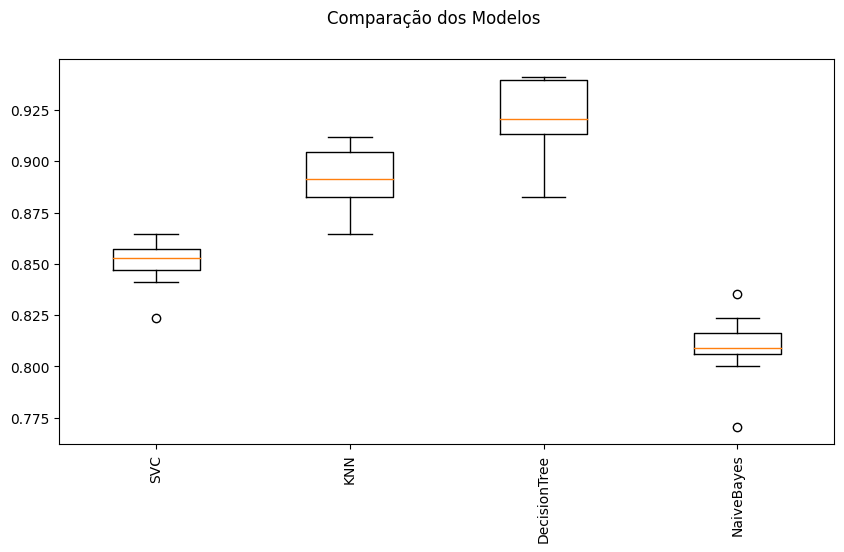

In [4]:
np.random.seed(1)
models = []

models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('NaiveBayes', GaussianNB()))

results = []
names = []

results_table = {
    "model": [],
    "accuracy": [],
    "std": []
}

for name, model in models:
  cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  results_table["model"].append(name)
  results_table["accuracy"].append(cv_results.mean())
  results_table["std"].append(cv_results.std())


df = pd.DataFrame(results_table)
print(df)

fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Comparação com dados padronizados e normalizados

                model  accuracy       std
0                 SVC  0.850588  0.011527
1                 KNN  0.892353  0.014421
2        DecisionTree  0.920000  0.020241
3          NaiveBayes  0.808824  0.016056
4            SVC-padr  0.909412  0.015384
5            KNN-padr  0.902941  0.016056
6   DecisionTree-padr  0.918235  0.021119
7     NaiveBayes-padr  0.727059  0.033192
8            SVC-norm  0.905882  0.020546
9            KNN-norm  0.908235  0.012671
10  DecisionTree-norm  0.915294  0.018824
11    NaiveBayes-norm  0.746471  0.031287


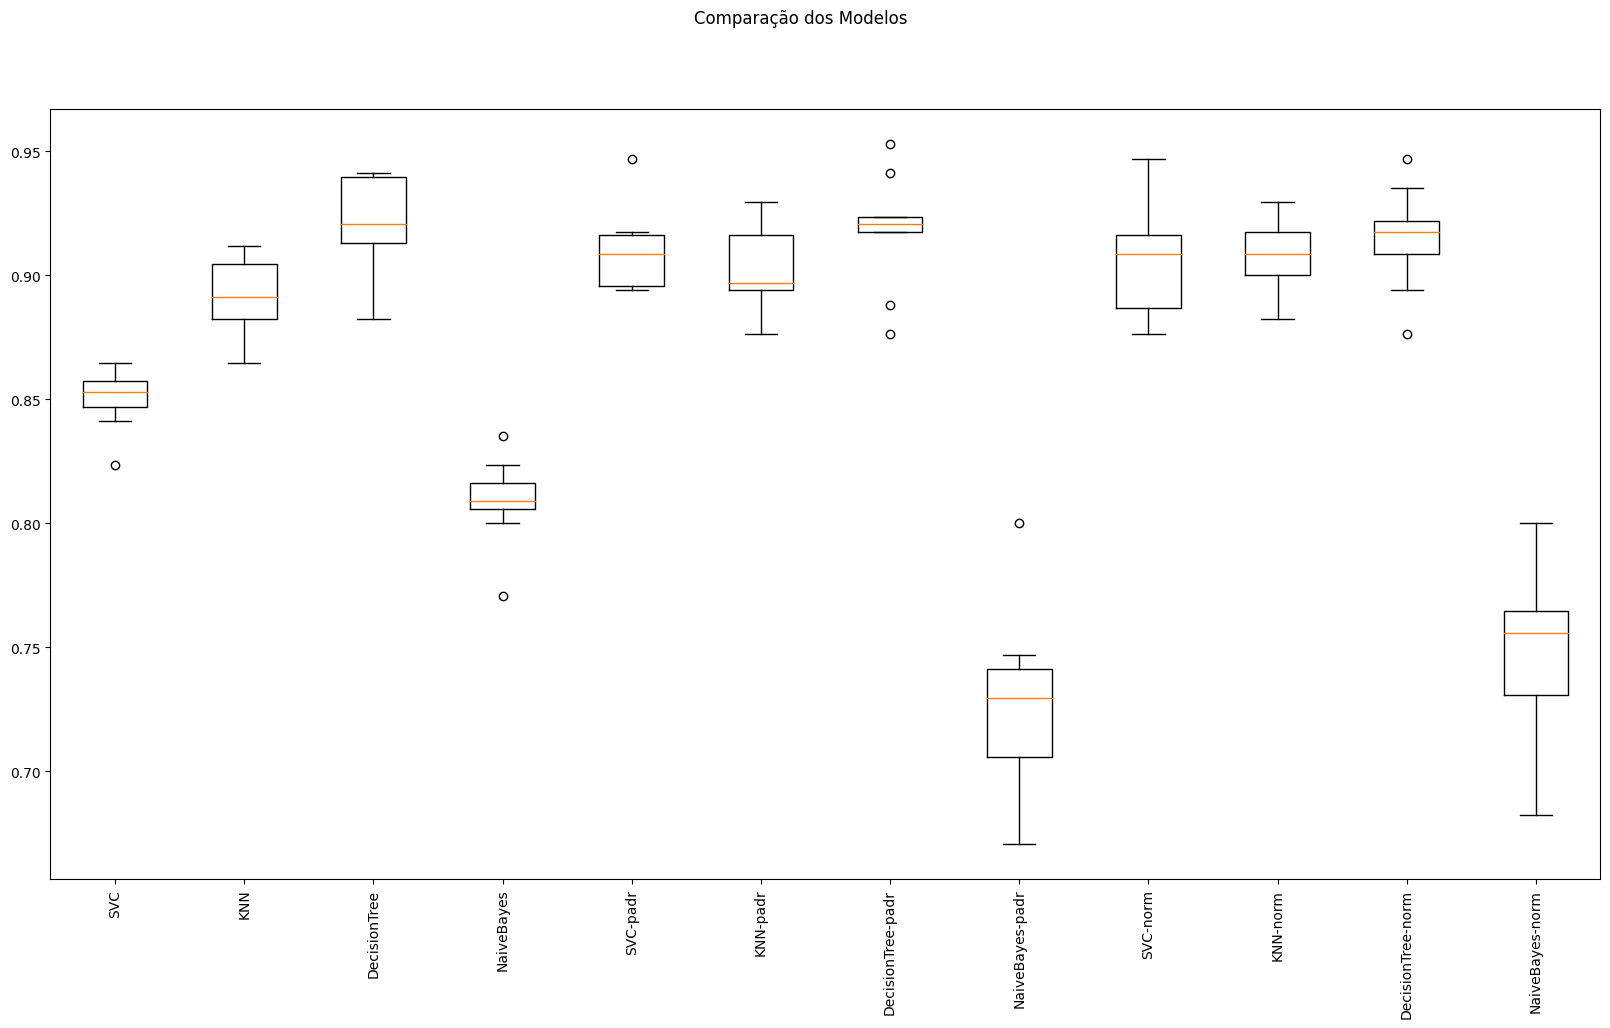

In [5]:
np.random.seed(1)

svc = (('SVC', SVC()))
knn = (('KNN', KNeighborsClassifier()))
decision_tree = (('DecisionTree', DecisionTreeClassifier()))
naive_bayes = (('NaiveBayes', GaussianNB()))

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []

pipelines.append(('SVC', Pipeline([svc])))
pipelines.append(('KNN', Pipeline([knn])))
pipelines.append(('DecisionTree', Pipeline([decision_tree])))
pipelines.append(('NaiveBayes', Pipeline([naive_bayes])))

pipelines.append(('SVC-padr', Pipeline([standard_scaler, svc])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('DecisionTree-padr', Pipeline([standard_scaler, decision_tree])))
pipelines.append(('NaiveBayes-padr', Pipeline([standard_scaler, naive_bayes])))

pipelines.append(('SVC-norm', Pipeline([min_max_scaler, svc])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('DecisionTree-norm', Pipeline([min_max_scaler, decision_tree])))
pipelines.append(('NaiveBayes-norm', Pipeline([min_max_scaler, naive_bayes])))

results_table = {
    "model": [],
    "accuracy": [],
    "std": []
}
results = []
names = []

for name, pipeline in pipelines:
  cv_results = cross_val_score(pipeline, Xtrain, Ytrain, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  results_table["model"].append(name)
  results_table["accuracy"].append(cv_results.mean())
  results_table["std"].append(cv_results.std())


df = pd.DataFrame(results_table)
print(df)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização de hiperparâmetros

In [6]:
np.random.seed(1)

pipelines = []

pipelines.append(('DecisionTree', Pipeline(steps=[decision_tree])))
pipelines.append(('DecisionTree-norm', Pipeline(steps=[min_max_scaler, decision_tree])))
pipelines.append(('DecisionTree-padr', Pipeline(steps=[standard_scaler, decision_tree])))

param_grid = {
    'DecisionTree__max_depth': [10, 20, 30],
    'DecisionTree__min_samples_split': [2, 5, 10, 15],
    'DecisionTree__min_samples_leaf': [1, 2, 4, 8]
}

for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
  grid.fit(Xtrain, Ytrain)
  print(name, grid.best_score_, grid.best_params_)

DecisionTree 0.9241176470588236 {'DecisionTree__max_depth': 30, 'DecisionTree__min_samples_leaf': 2, 'DecisionTree__min_samples_split': 5}
DecisionTree-norm 0.9241176470588236 {'DecisionTree__max_depth': 30, 'DecisionTree__min_samples_leaf': 2, 'DecisionTree__min_samples_split': 5}
DecisionTree-padr 0.9270588235294118 {'DecisionTree__max_depth': 30, 'DecisionTree__min_samples_leaf': 2, 'DecisionTree__min_samples_split': 2}


## Teste com holdout

In [8]:
np.random.seed(1)

scaler = StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)

model = DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=2)
model.fit(Xtrain_scaled, Ytrain)

Xtest_scaled = scaler.transform(Xtest)
result = model.predict(Xtest_scaled)

print(accuracy_score(Ytest, result))


0.9014084507042254


## Ajuste do modelo final para todo o conjunto de dados

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

model.fit(X_scaled, Y)

filename = 'standardscaler_fetalhealth.pkl'
pickle.dump(scaler, open(filename, 'wb'))

filename = 'model_fetalhealth.pkl'
pickle.dump(model, open(filename, 'wb'))

## Conclusões da análise

O conjunto de dados de saúde fetal foi melhor classificado utilizando-se algoritmos de **árvore de decisão**. Com a padronização dos dados utilizando este modelo, observou-se melhor acurácia e um baixo desvio padrão, sendo assim este o modelo que realizou as melhores predições.

Após a otimização dos hiperparâmetros, o modelo padronizado continuou com a melhor acurárcia, sendo esta otimizada quando a Profundidade Máxima da árvore era 30, o Número mínimo de amostras para dividir um nó era 2 e o Número mínimo de amostras para um nó folha era 2.

Portanto, este modelo apresentou a melhor capacidade de predição se o estado de saúde do feto era Saudável (1), Suspeito (2) ou Patológico (3), sendo assim um potencial aliado a profissionais de saúde na intepretação de resultados quando na avaliação de gestantes através do exame de cardiotocografia.